In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/cleaned_text.csv')

In [3]:
df.head()

,reviewId,content,score,thumbsUpCount,at,appVersion,clean_content,text_length,year_month
0,ad73063f-976a-4905-bc32-d21f9a3221e4,keren,5,0,2025-04-09 13:36:54,9.0.26.632,keren,1,2025-04
1,8ae8b09d-17dd-402a-a525-b68c61742976,pretty good,5,0,2025-04-09 13:34:58,9.0.32.624,pretty good,2,2025-04
2,dfa29675-61a2-4cb7-81b2-d14a5f5a7ba0,nice app for music,5,0,2025-04-09 13:32:33,9.0.28.630,nice app for music,4,2025-04
3,877813e9-a951-49cd-94a4-467a068bae86,"Can't log in, using YouTube prime instead",5,0,2025-04-09 13:28:59,9.0.32.624,cant log in using youtube prime instead,7,2025-04
4,2701ca76-6c08-44e8-b3ae-578efa759d6a,sometimes you people impersonating other artis...,2,0,2025-04-09 13:25:07,NaN,sometimes you people impersonating other artis...,15,2025-04


In [4]:
def label_sentiment(score):
    if score >= 4:
        return 'positive'
    elif score <= 2:
        return 'negative'
    else:
        return 'neutral'

df['sentiment'] = df['score'].apply(label_sentiment)

In [5]:
df_binary = df[df['sentiment'] != 'neutral']

In [6]:
df_binary = df_binary.drop(columns=['reviewId', 'thumbsUpCount', 'at', 'appVersion', 'content', 'text_length', 'year_month'])

In [7]:
df_binary = df_binary.dropna()

In [8]:
X = df_binary['clean_content']
y = df_binary['sentiment']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)


In [9]:
custom_stopwords = list(text.ENGLISH_STOP_WORDS.union([
    'app', 'spotify', 'music', 'songs', 'song', 'listen', 'just', 'dont', 'want', 'use', 'im', 'listening', 'time'
]))

In [10]:
vectorizer = TfidfVectorizer(max_features=10000, stop_words=custom_stopwords)
X_train_vec = vectorizer.fit_transform(X_train)
X_val_vec = vectorizer.transform(X_val)
X_test_vec = vectorizer.transform(X_test)

In [11]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)

y_pred = model.predict(X_test_vec)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.89      0.88      0.88     19094
    positive       0.92      0.92      0.92     27149

    accuracy                           0.90     46243
   macro avg       0.90      0.90      0.90     46243
weighted avg       0.90      0.90      0.90     46243



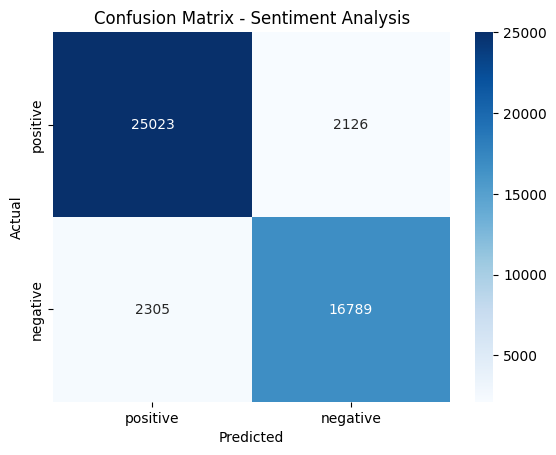

In [12]:
cm = confusion_matrix(y_test, y_pred, labels=['positive', 'negative'])

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['positive', 'negative'], yticklabels=['positive', 'negative'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Sentiment Analysis')
plt.show()